# Graphs of COVID cases data by region
### Might do predictions/regressions later idk


In [31]:
#%%debug
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np 
import pandas as pd

# All confirmed cases
path_cases = "./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
all_cases_df = pd.read_csv(path_cases, header=0)

# Recovered cases
path_recovered = "./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
recovered_df = pd.read_csv(path_recovered, header=0)

# Global deaths
path_global_deaths = "./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
global_deaths_df = pd.read_csv(path_global_deaths, header=0)

# US deaths
path_us_deaths = "./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
us_deaths_df = pd.read_csv(path_us_deaths, header=0)

path_out = "./graphs/"

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 50
dates = all_cases_df.columns[start_date_idx:-1]

# Active cases = all cases - recovered - deaths
# TODO: figure out why - deahts isn't working
active_cases_df = all_cases_df
active_cases_df[dates] = (active_cases_df[dates].sub(recovered_df[dates])).sub(global_deaths_df[dates])

In [32]:
print(active_cases_df.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/15/20  5/16/20  5/17/20  5/18/20  \
0        0        0        0  ...   5155.0   5489.0   5717.0   6098.0   
1        0        0        0  ...    180.0    188.0    200.0    190.0   
2        0        0        0  ...   2822.0   2870.0   2964.0   3021.0   
3        0        0        0  ...    108.0     95.0     93.0     86.0   
4        0        0        0  ...     29.0     29.0     29.0     30.0   

   5/19/20  5/20/20  5/21/20  5/22/20  5/23/20  5/24/20  
0   6625.0   7028.0   

In [33]:
# Plot regions (each region is a subplot)
def plot_place(df, column, dates, ylabel="Cases", title="Regions", style="bmh", yscale="linear"):
    fig, ax = plt.subplots(figsize=(20, 10)) 
    plt.yscale(yscale)
    for region in df[column]:
        region_data = df.loc[lambda c: df[column] == region, dates]
        ax.plot(dates, 
                region_data.transpose(),
                label=region)
        loc = plticker.MultipleLocator(base=len(dates) / 10) # Put tick at every <base> days
        ax.xaxis.set_major_locator(loc)
        ax.set(xlabel="Date", ylabel=ylabel)
    plt.title(title)
    plt.legend(loc="upper left")
    fig.savefig("{}{}-{}_{}_{}".format(
        path_out, 
        title.replace(" ", "-"), 
        yscale,
        dates[0].replace("/", "-"), 
        dates[-1].replace("/", "-"))
    )
    # bmh and dark_background are cool
    plt.style.use(style)
    plt.show()

## Top 15 regions (including countries, provinces, states) 

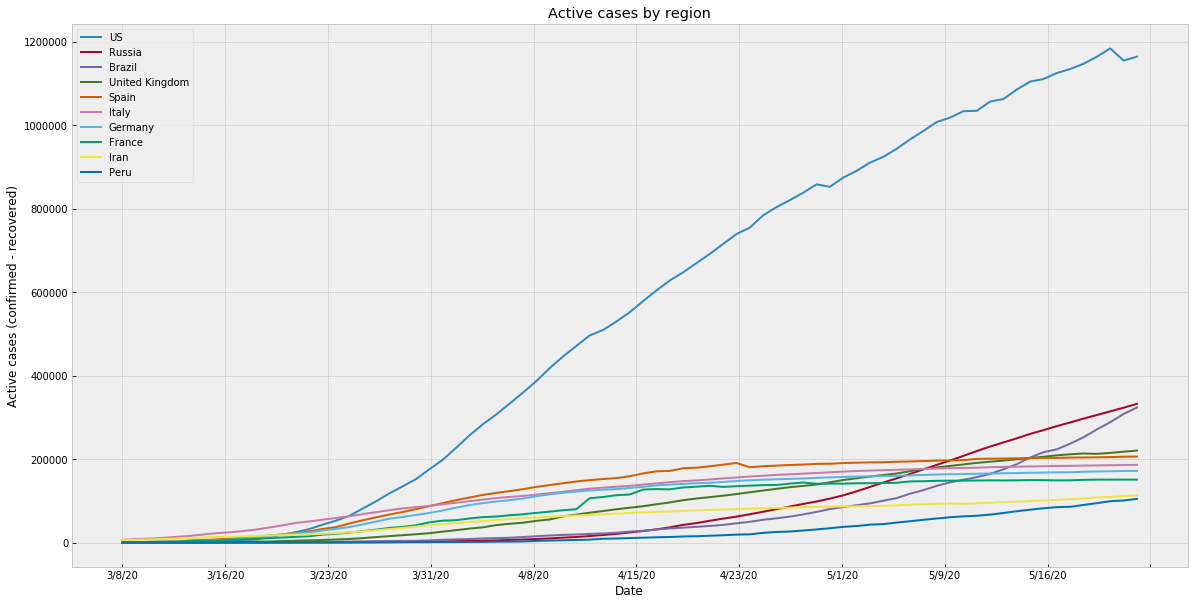

In [34]:
# Fill in any missing Province/State with country
countries_states = active_cases_df.copy()
countries_states["Province/State"].fillna(countries_states["Country/Region"], inplace=True) 

# Show regions with highest number of cases 1 week ago
num_regions = 10
countries_states = countries_states.nlargest(num_regions, dates[-7])

# Plot countries/provinces in selected range
plot_place(countries_states, 
           "Province/State", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases by region")

## Top 20 countries

  Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  1/25/20  \
0    Afghanistan  33.0000  65.0000        0        0        0        0   
1        Albania  41.1533  20.1683        0        0        0        0   
2        Algeria  28.0339   1.6596        0        0        0        0   
3        Andorra  42.5063   1.5218        0        0        0        0   
4         Angola -11.2027  17.8739        0        0        0        0   

   1/26/20  1/27/20  1/28/20  ...  5/15/20  5/16/20  5/17/20  5/18/20  \
0        0        0        0  ...      153      168      169      173   
1        0        0        0  ...       31       31       31       31   
2        0        0        0  ...      536      542      548      555   
3        0        0        0  ...       49       51       51       51   
4        0        0        0  ...        2        2        2        3   

   5/19/20  5/20/20  5/21/20  5/22/20  5/23/20  5/24/20  
0      178      187      193      205      216      218  


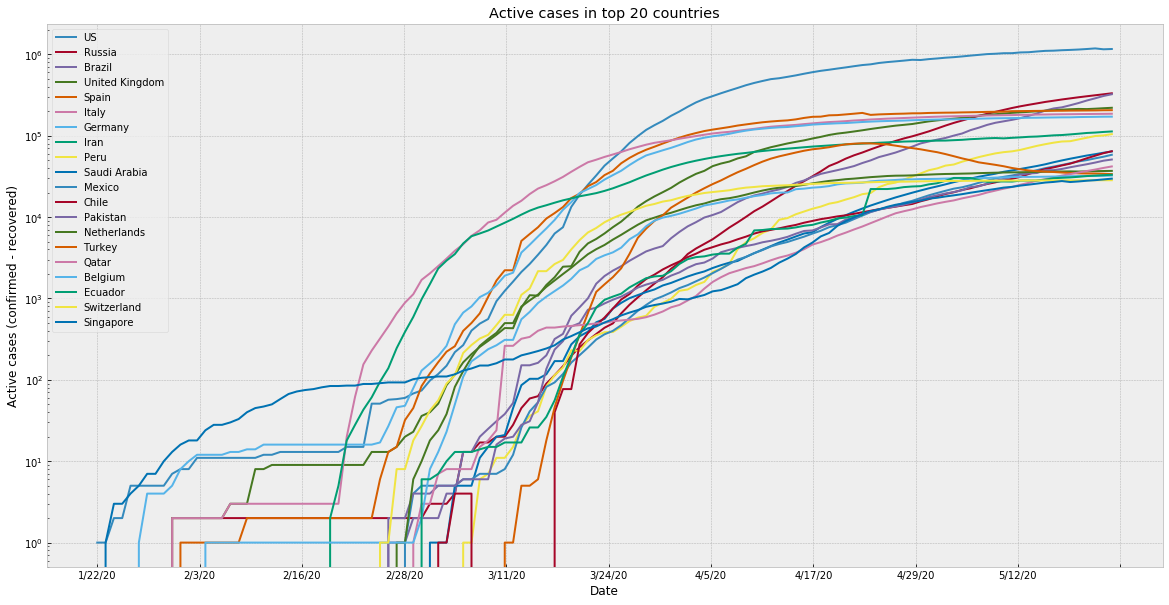

In [25]:
# Group all states/provinces together into countries
countries_deaths = global_deaths_df.groupby('Country/Region', squeeze=True).sum().reset_index()
print(countries_deaths.head())

# Group all states/provinces together into countries
countries = active_cases_df.groupby('Country/Region', squeeze=True).sum().reset_index()

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 3
dates = countries.columns[start_date_idx:-1]

# Select 15 regions with highest number of cases as of 1 week ago
num_regions = 20
countries = countries.nlargest(num_regions, dates[-7])
plot_place(countries, 
           "Country/Region", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 countries",
           yscale="log")

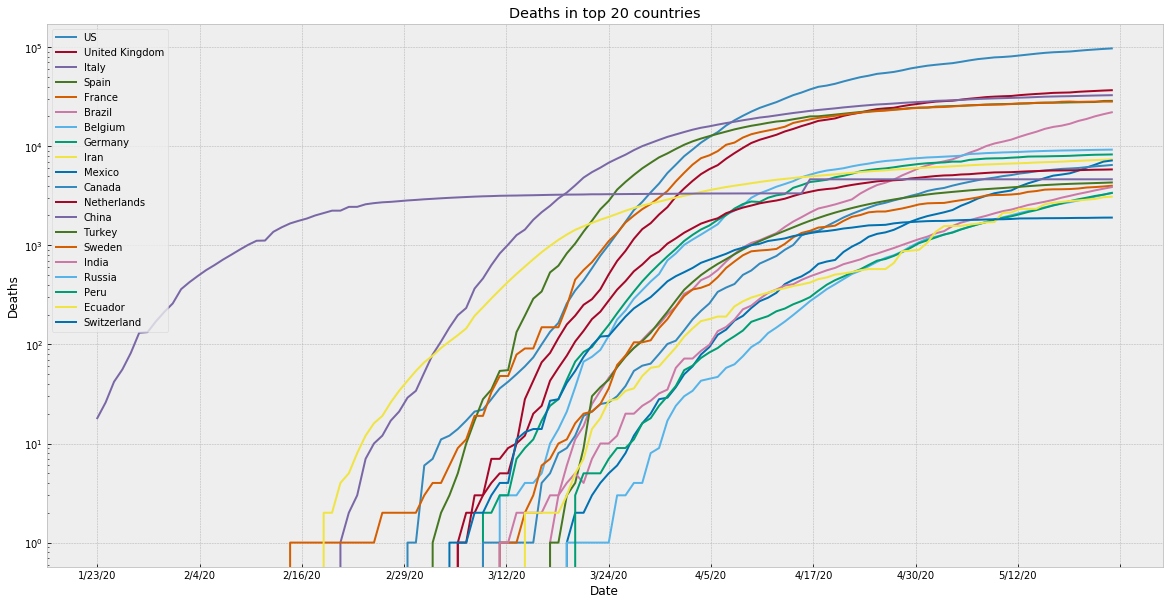

In [29]:

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 4
dates = countries_deaths.columns[start_date_idx:-1]

# Select 15 regions with highest number of cases as of 1 week ago
num_regions = 20
countries_deaths = countries_deaths.nlargest(num_regions, dates[-2])
plot_place(countries_deaths, 
           "Country/Region", 
           dates, 
           ylabel="Deaths", 
           title="Deaths in top 20 countries",
           yscale="log")



In [ ]:
# New Deaths



## US States

In [23]:
us_deaths_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population',
       '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020', '2/5/2020', '2/6/2020',
       '2/7/2020', '2/8/2020', '2/9/2020', '2/10/2020', '2/11/2020',
       '2/12/2020', '2/13/2020', '2/14/2020', '2/15/2020', '2/16/2020',
       '2/17/2020', '2/18/2020', '2/19/2020', '2/20/2020', '2/21/2020',
       '2/22/2020', '2/23/2020', '2/24/2020', '2/25/2020', '2/26/2020',
       '2/27/2020', '2/28/2020', '2/29/2020', '3/1/2020', '3/2/2020',
       '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020', '3/7/2020', '3/8/2020',
       '3/9/2020', '3/10/2020', '3/11/2020', '3/12/2020', '3/13/2020',
       '3/14/2020', '3/15/2020', '3/16/2020', '3/17/2020', '3/18/2020',
       '3/19/2020', '3/20/2020', '3/21/2020', '3/22/20

Index(['2/9/2020', '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020',
       '2/14/2020', '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020',
       '2/19/2020', '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020',
       '2/24/2020', '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020',
       '2/29/2020', '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020', '3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020',
       '3/16/2020', '3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020',
       '3/21/2020', '3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020',
       '3/26/2020', '3/27/2020', '3/28/2020', '3/29/2020'],
      dtype='object')


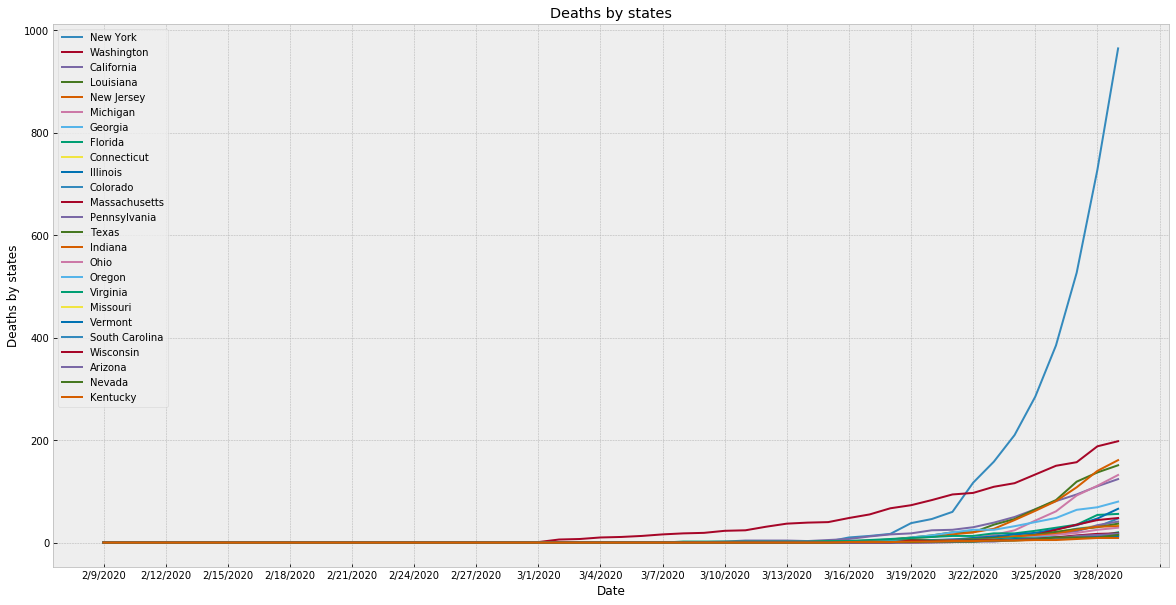

In [37]:
deaths_states = us_deaths_df.groupby('Province_State', squeeze=True).sum().reset_index()

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 30
dates = us_deaths_df.columns[start_date_idx:-1]
print(dates)

# Show regions with highest number of cases 1 week ago
num_regions = 25
deaths_states = deaths_states.nlargest(num_regions, dates[-5])

# Plot countries/provinces in selected range
plot_place(deaths_states, 
           "Province_State", 
           dates, 
           ylabel="Deaths by states", 
           title="Deaths by states")

In [12]:
states = active_cases_df[active_cases_df['Country/Region'].eq("US")]

# Get rid of counties/cities
states = states[~states["Province/State"].str.contains(",")]

num_states = 20
states = states.nlargest(num_regions, dates[-7])

# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 50
dates = states.columns[start_date_idx:-1]

plot_place(states, 
           "Province/State", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 states")

TypeError: bad operand type for unary ~: 'float'

In [ ]:
"""
# Select date range where
# start_date_idx: 0=1/22, 32=2/19 etc
start_date_idx = 40
dates = countries.columns[start_date_idx:-1]

# Select 15 regions with highest number of cases as of 1 week ago
num_regions = 20
countries = countries.nlargest(num_regions, dates[-7])
plot_place(countries, 
           "Country/Region", 
           dates, 
           ylabel="Active cases (confirmed - recovered)", 
           title="Active cases in top 20 countries")
           """

In [47]:
# Do % of population and compare to hospital beds